<b> Assignment 01</b>
</br> </br>
<b> Name : </b> Yatharth Thakare </br>
<b> PRN no : </b> 12111403 </br>
<b> Roll no : </b> AI C </br>
<b> Subject : </b> SI </br>


In [66]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [68]:
df_housing.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [69]:
missing_values = df_housing.isnull().sum()
missing_values

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [70]:
df_housing.corr()

<ipython-input-70-4e998b32f5e8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_housing.corr()


,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


In [71]:
correlation_matrix = df_housing.corr()
correlation_with_price = correlation_matrix['price'].abs().sort_values(ascending=False)
print(correlation_with_price)

price        1.000000
area         0.535997
bathrooms    0.517545
stories      0.420712
parking      0.384394
bedrooms     0.366494
Name: price, dtype: float64


<ipython-input-71-4cd243fff811>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_housing.corr()


In [72]:
X = np.array(df_housing['area'])
y = np.array(df_housing['price'])
# print(len(y))

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

##Implementing Linear Regression from scratch

m = cov(x, y) / var(x)
b = mean(y) — m * mean(x)


In [75]:
X_mean = np.mean(X_train)
y_mean = np.mean(y_train)
print(X_mean,y_mean)

5128.40157480315 4762406.272965879


In [76]:
var = np.var(X_train)
print(var)

4728270.187819042


In [77]:
sum = 0
for i in range(len(X_train)):
  sum+= ((X_train[i]-X_mean)*(y_train[i]-y_mean))

covv = sum/(len(X_train)-1)

In [78]:
m = covv/var
print(m)
b = y_mean - (X_mean*m)
print(b)

450.6297634720927
2451395.884322428


Pred values for X_test

In [79]:
pred = []
for x in X_test:
  y = m*x+b
  pred.append(y)

print(pred)

[5110111.488807775, 5380489.346891031, 4271940.128749683, 4704544.701682892, 4235889.747671915, 5479627.894854891, 6290761.469104658, 4700038.404048171, 3911436.317972008, 3668096.2456970783, 6317799.254912984, 4224173.37382164, 4127738.604438613, 3848348.1510859155, 4240396.045306636, 4087181.9257261246, 3352655.4112666138, 5155174.465154985, 5087580.000634171, 5155174.465154985, 4713557.296952333, 5526944.0200194605, 4095743.8912320943, 4163788.9855163805, 6169091.432967193, 6939668.328504471, 3843841.8534511942, 3803285.174738706, 8399708.762154052, 3803285.174738706, 4253914.938210798, 3857360.7463553576, 5155174.465154985, 5432311.769690322, 4603153.004901671, 4524292.796294054, 4545021.76541377, 3884398.532163683, 4019587.4612053107, 3707301.0351191508, 6047421.396829728, 4087181.9257261246, 5344438.965813263, 4344040.890905217, 5493146.787759054, 5103352.042355694, 5155174.465154985, 4542317.986832938, 6078965.480272774, 3803285.174738706, 5819853.366276321, 3803285.174738706, 5

In [80]:
print(len(X_test),len(pred))

164 164


In [81]:
pred_y = np.array(pred)

## Output

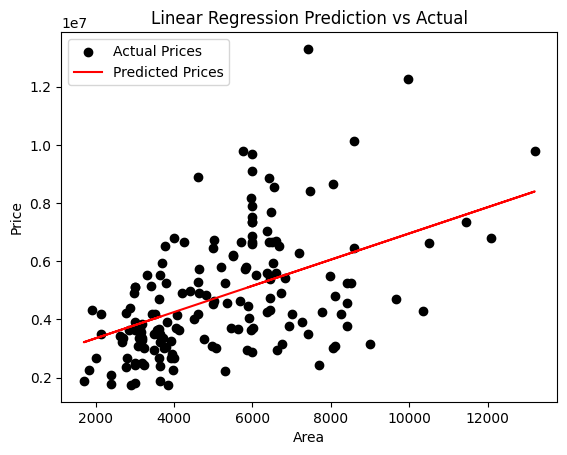

In [82]:
plt.scatter(X_test, y_test, c='black', label='Actual Prices')
plt.plot(X_test, pred_y, c='red', label='Predicted Prices')
plt.title('Linear Regression Prediction vs Actual')
plt.xlabel('Area')
plt.ylabel('Price')
plt.legend()
plt.show()

In [85]:
MSE = np.mean((y_test - pred)**2)
print("Mean Squared Error:", MSE)

Mean Squared Error: 3193534442987.1797


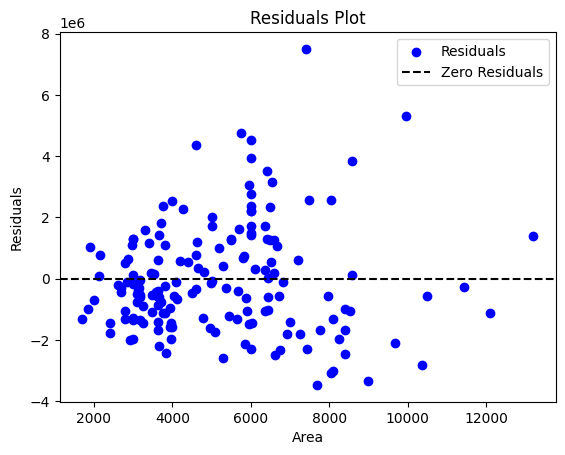

In [89]:
residuals = y_test - pred
plt.scatter(X_test, residuals, c='blue', label='Residuals')
plt.axhline(y=0, color='black', linestyle='--', label='Zero Residuals')
plt.title('Residuals Plot')
plt.xlabel('Area')
plt.ylabel('Residuals')
plt.legend()
plt.show()